In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from skimage.io import imread
from skimage.transform import resize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

In [3]:
def save_resized_image(src, pklname, include, width=32, height=None):
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1}) images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    im = np.asarray(im).flatten()
                    data['label'].append(subdir)
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [4]:
cate = {
    1:'Cấm ngược chiều',
    2:'Cấm dừng và đỗ',
    3:'Cấm rẽ',
    4:'Giới hạn tốc độ',
    5:'Cấm còn lại',
    6:'Nguy hiểm',
    7:'Hiệu lệnh'
}
train_path = 'dataset/GTSRB/train'
test_path = 'dataset/GTSRB/validate'
include = os.listdir(train_path)
save_resized_image(src=train_path, pklname='train', width=32, include=include)
save_resized_image(src=test_path, pklname='test', width=32, include=include)

1
2
3
4
5
6
7
1
2
3
4
5
6
7


In [5]:
from collections import Counter
 
train_data = joblib.load('train_32x32px.pkl')
test_data = joblib.load('test_32x32px.pkl')
 
print('number of samples: ', len(train_data['data']))
print('keys: ', list(train_data.keys()))
print('description: ', train_data['description'])
print('image shape: ', train_data['data'][0].shape)
print('labels:', np.unique(train_data['label']))
 
print(Counter(train_data['label']))
print(Counter(test_data['label']))

number of samples:  2948
keys:  ['description', 'label', 'filename', 'data']
description:  resized (32x32) images in rgb
image shape:  (3072,)
labels: ['1' '2' '3' '4' '5' '6' '7']
Counter({'5': 500, '6': 498, '1': 439, '2': 425, '4': 419, '7': 378, '3': 289})
Counter({'6': 55, '5': 53, '1': 49, '2': 47, '4': 47, '7': 42, '3': 32})


In [6]:
X_train = np.array(train_data['data'])
y_train = np.array(train_data['label'])
X_test = np.array(test_data['data'])
y_test = np.array(test_data['label'])


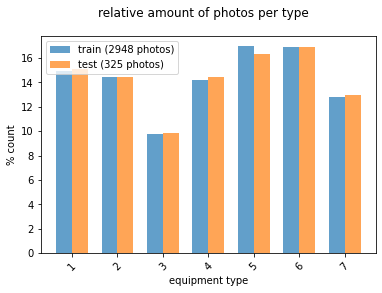

In [7]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
])

In [8]:
print(X_train.shape)

(2948, 3072)


In [9]:
clf = MLPClassifier(hidden_layer_sizes=[16,32], activation='relu', solver='adam', batch_size=32, random_state=1, max_iter=300)
clf.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=[16, 32], max_iter=300,
              random_state=1)

In [11]:
y_pred = clf.predict(X_test)

print("Print results for 20 test data points:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)
print(f"Accuracy of {n_neighbors}NN: {100*accuracy_score(y_test, y_pred)}%")
print(f"F1-Scores of {n_neighbors}NN: {100*f1_score(y_test, y_pred, average='macro')}%")

Print results for 20 test data points:
Predicted labels:  ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '3' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '4' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '4' '4' '4' '4' '3' '4' '4' '5' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '3' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '5' '3' '5' '5'
 '5' '5' '5' '4' '5' '5' '5' '3' '5' '5' '4' '3' '3' '5' '5' '5' '5' '4'
 '5' '5' '5' '5' '5' '5' '3' '5' '5' '3' '5' '3' '3' '4' '3' '5' '4' '1'
 '4' '4' '3' '5' '4' '1' '1' '5' '4' '5' '5' '5' '6' '6' '6' '6' '